In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
class AnalysisCSV:

   def __init__(self, fileName):
      
      self.DataDF = pd.read_csv(fileName['Data'])
      self.RewardDF = pd.read_csv(fileName['Rewards'])

In [4]:
manualFiles = {
   'Data': 'ManualControlActions.csv',
   'Rewards': 'ManualControlRewards.csv'
}

baseline = False
fileName = {
   True: 'Baseline',
   False: 'Agent'
}

agentFiles = {
    'Data': f'{fileName[baseline]}ControlActions.csv',
    'Rewards': f'{fileName[baseline]}ControlRewards.csv'
}

ManualControl = AnalysisCSV(manualFiles)
AgentControl = AnalysisCSV(agentFiles)

In [5]:
def Compare(ManualControl, AgentControl):

   Info = {
      'Speed': (ManualControl.DataDF['Speed'], AgentControl.DataDF['Speed']),
      'Actions': (ManualControl.DataDF['Action'], AgentControl.DataDF['Action']),
      'Crashed':(ManualControl.RewardDF['Crashed'], AgentControl.RewardDF['Crashed']),
      'Rewards': (ManualControl.RewardDF['Rewards'], AgentControl.RewardDF['Rewards'])
   }

   fig, axs = plt.subplots(1, 2, figsize = (12, 5))

   ax = axs[0]
   #ax.hist(Info['Speed'][0], label = 'Manual Control', alpha = 0.5)
   ax.hist(Info['Speed'][1], label = 'Agent Control', alpha = 0.5)

   ax = axs[1]
   # ax.hist(Info['Actions'][0], label = 'Manual Control', alpha = 0.5)
   # ax.hist(Info['Actions'][1], label = 'Agent Control', alpha = 0.5)


   fig, axs = plt.subplots(1, 2, figsize = (12, 5))

   # ax = axs[0]   
   # ax.hist(Info['Crashed'][0], label = 'Manual Control')
   # ax.hist(Info['Crashed'][1], label = 'Agent Control')

   ax = axs[1]   
   #ax.hist(Info['Rewards'][0], label = 'Manual Control', alpha = 0.5)
   ax.hist(Info['Rewards'][1], label = 'Agent Control', alpha = 0.5)

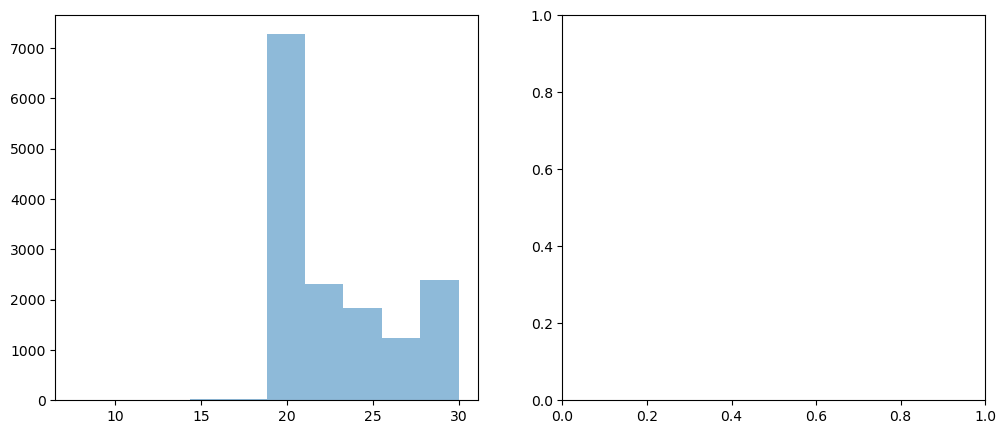

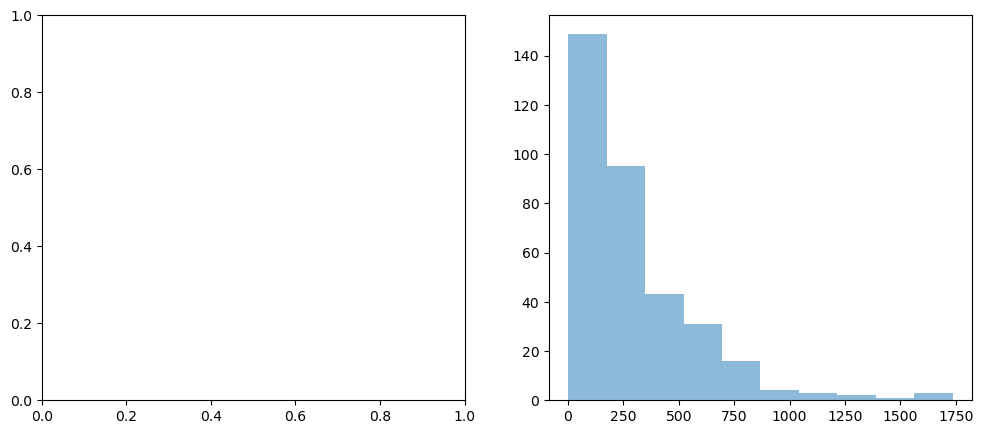

In [6]:
Compare(ManualControl, AgentControl)